<a href="https://colab.research.google.com/github/hackergod00001/Apriori-algorithm/blob/master/Apriori_algorithm_using_std_libraries_of_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pandas.plotting import parallel_coordinates

In [2]:
grocery = pd.read_csv('/content/GroceryStoreDataSet.csv', names = ['Products'], sep = ',')

In [3]:
grocery.head(5)

,Products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [4]:
grocery.tail(5)

,Products
15,"COFFEE,SUGER,CORNFLAKES"
16,"BREAD,SUGER,BOURNVITA"
17,"BREAD,COFFEE,SUGER"
18,"BREAD,COFFEE,SUGER"
19,"TEA,MILK,COFFEE,CORNFLAKES"


In [5]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [6]:
grocery.shape

(20, 1)

Here we come to know that, there are no null records. Total 20 records are present in one single columns.

In [7]:
grocery_df = list(grocery["Products"].apply(lambda x:x.split(",") ))
grocery_df

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [20]:
liste = []

for i in range(len(grocery_df)):
    x = grocery_df[i]
    print(x)
    liste.append(x)

['MILK', 'BREAD', 'BISCUIT']
['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES']
['BREAD', 'TEA', 'BOURNVITA']
['JAM', 'MAGGI', 'BREAD', 'MILK']
['MAGGI', 'TEA', 'BISCUIT']
['BREAD', 'TEA', 'BOURNVITA']
['MAGGI', 'TEA', 'CORNFLAKES']
['MAGGI', 'BREAD', 'TEA', 'BISCUIT']
['JAM', 'MAGGI', 'BREAD', 'TEA']
['BREAD', 'MILK']
['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES']
['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES']
['COFFEE', 'SUGER', 'BOURNVITA']
['BREAD', 'COFFEE', 'COCK']
['BREAD', 'SUGER', 'BISCUIT']
['COFFEE', 'SUGER', 'CORNFLAKES']
['BREAD', 'SUGER', 'BOURNVITA']
['BREAD', 'COFFEE', 'SUGER']
['BREAD', 'COFFEE', 'SUGER']
['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']


In [21]:
encoder = TransactionEncoder()
pred = encoder.fit_transform(liste)
df = pd.DataFrame(pred,columns = encoder.columns_)
df.head(5)

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


Here, we have split the products and create a list.

**One Hot Encoding**

Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list. Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.

In [8]:
te = TransactionEncoder()
te_data = te.fit(grocery_df).transform(grocery_df)
gdf = pd.DataFrame(te_data, columns = te.columns_)
gdf = gdf.replace(False,0)
gdf

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
gdf = gdf.replace(True,1)
gdf

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


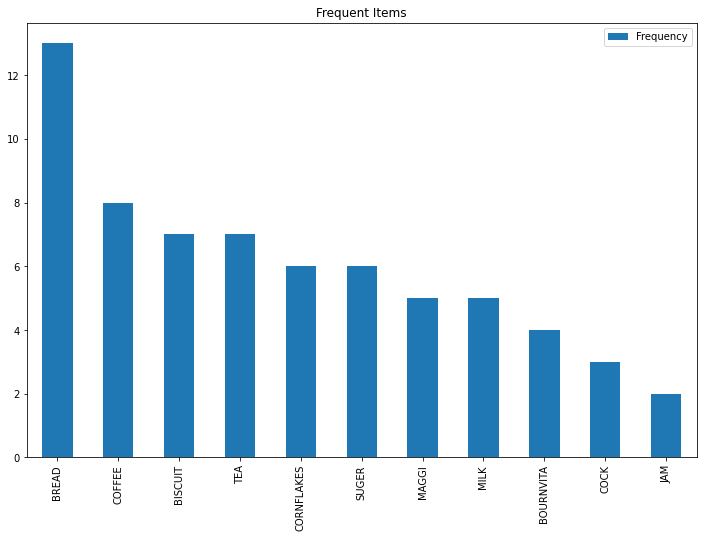

In [10]:
gdf.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

**Applying Apriori Algorithm**

In the next step, we are applying Apriori algrithm. For this data set, we'll set a min_support value with a threshold value of 20% and printed them on the screen as well.

In [12]:
gdf1 = apriori(gdf, min_support = 0.2, use_colnames = True)
gdf1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BREAD, BISCUIT)"


In [13]:
gdf1.sort_values(by = "support" , ascending = False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
8,0.35,(TEA)
4,0.30,(CORNFLAKES)
7,0.30,(SUGER)
5,0.25,(MAGGI)
6,0.25,(MILK)
1,0.20,(BOURNVITA)
9,0.20,"(BREAD, BISCUIT)"


## **Sorted from highest to lowest WRT Support values**



**In the next step, we'll chose the 60% minimum confidence value. In other words, when product A is purchased, product B also got purchased 60% or more time.**

In [14]:
gdf_rules = association_rules(gdf1, metric = 'confidence', min_threshold = 0.6)
gdf_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


From above table:

1.   The probability of Milk sales is 25%
2.   Milk and Bread are sold together in 20% of all purchases (support)
3.   80% of customers who buy Milk will also buy Bread (confidence)
4.   Sales of Bread increased by 1.23 times in shopping with Milk (lift)
5.   Milk & Bread correlation with each other is seen as 1.75

In [15]:
gdf_rules.sort_values(by = "lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05


**Lift indicates:**

*   Whether if two type of products can be sold together - **lift value higher than 1**
*   Whether 1 product be substitute of other - **lift value lower than 1**
*   Whether if there is no relation between the type or products - **lift value equals to 1**

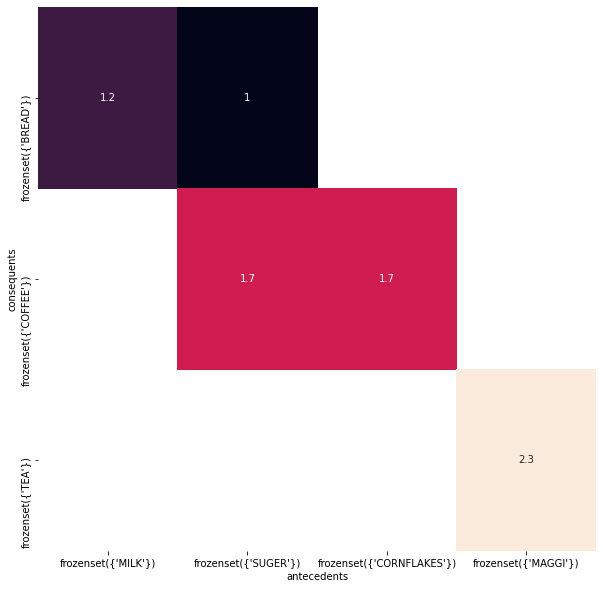

In [26]:
fig, ax = plt.subplots(figsize = (10,10))
pivot = gdf_rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')
sns.heatmap(pivot,annot=True,cbar=False,ax = ax)
plt.show()

In [29]:
fig = px.scatter(x=gdf_rules['support'], y=gdf_rules['confidence'])

fig.show()

In [31]:
gdf_rules['antecedent'] = gdf_rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
gdf_rules['consequent'] = gdf_rules['consequents'].apply(lambda consequents : list(consequents)[0])
gdf_rules['rule'] = gdf_rules.index
gdf_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,MILK,BREAD,0
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,SUGER,BREAD,1
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,CORNFLAKES,COFFEE,2
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,SUGER,COFFEE,3
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,MAGGI,TEA,4


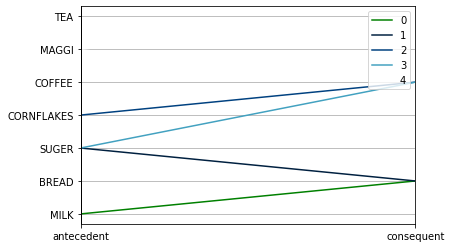

In [35]:
cords = gdf_rules[['antecedent','consequent','rule']]

parallel_coordinates(cords,'rule',colormap = 'ocean')

### The parallel_coordinates chart shows that Bread and Biscuit are good two items as a antecedent and consequent.

(BISCUIT,BREAD) and (TEA,BREAD) have lowest leverage with the minimum lift value in entire dataset